In [1]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
import pandas as pd

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mangl\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [11]:
data =pd.read_csv('Data Analyst - Test Data - US.csv')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6448 entries, 0 to 6447
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review    6393 non-null   object
 1   date      6448 non-null   object
 2   Location  1711 non-null   object
dtypes: object(3)
memory usage: 151.2+ KB


In [13]:
del data['Location']
data = data.dropna()
print(data.head())

                                              Review        date
0  I was very impressed with the resort.\n Great ...  2019/08/20
1  The rooms were nice the outside needs work als...  2019/08/20
2  Great location! I have stayed at this hotel on...  2019/08/20
3  The hotel was adequate for my stay. The strips...  2019/08/20
4  Great location, room was large and spacious. P...  2019/08/19


In [14]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Review"]]
data['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in data["Review"]]
data.head()

,Review,date,Positive,Negative,Neutral,Compound
0,I was very impressed with the resort.\n Great ...,2019/08/20,0.355,0.000,0.645,0.9421
1,The rooms were nice the outside needs work als...,2019/08/20,0.333,0.066,0.601,0.8360
2,Great location! I have stayed at this hotel on...,2019/08/20,0.196,0.000,0.804,0.6588
3,The hotel was adequate for my stay. The strips...,2019/08/20,0.102,0.073,0.825,0.3634
4,"Great location, room was large and spacious. P...",2019/08/19,0.458,0.000,0.542,0.9260


In [15]:
score = data["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05 :
        sentiment.append('Positive')
    elif i <= -0.05 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
data["Sentiment"] = sentiment
data.head()

,Review,date,Positive,Negative,Neutral,Compound,Sentiment
0,I was very impressed with the resort.\n Great ...,2019/08/20,0.355,0.000,0.645,0.9421,Positive
1,The rooms were nice the outside needs work als...,2019/08/20,0.333,0.066,0.601,0.8360,Positive
2,Great location! I have stayed at this hotel on...,2019/08/20,0.196,0.000,0.804,0.6588,Positive
3,The hotel was adequate for my stay. The strips...,2019/08/20,0.102,0.073,0.825,0.3634,Positive
4,"Great location, room was large and spacious. P...",2019/08/19,0.458,0.000,0.542,0.9260,Positive


In [16]:
print(data["Sentiment"].value_counts())

Positive    4413
Negative    1257
Neutral      723
Name: Sentiment, dtype: int64


In [18]:
data['Review_Length'] = data.Review.str.len()

In [19]:
data.head()

,Review,date,Positive,Negative,Neutral,Compound,Sentiment,Review_Length
0,I was very impressed with the resort.\n Great ...,2019/08/20,0.355,0.000,0.645,0.9421,Positive,196
1,The rooms were nice the outside needs work als...,2019/08/20,0.333,0.066,0.601,0.8360,Positive,134
2,Great location! I have stayed at this hotel on...,2019/08/20,0.196,0.000,0.804,0.6588,Positive,106
3,The hotel was adequate for my stay. The strips...,2019/08/20,0.102,0.073,0.825,0.3634,Positive,447
4,"Great location, room was large and spacious. P...",2019/08/19,0.458,0.000,0.542,0.9260,Positive,126


In [26]:
data.Review_Length.groupby(data.Sentiment).value_counts()

Sentiment  Review_Length
Negative   278              21
           279              20
           276              18
           280              16
           277              15
                            ..
Positive   1508              1
           1512              1
           1513              1
           1519              1
           1525              1
Name: Review_Length, Length: 1490, dtype: int64

In [27]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6393 entries, 0 to 6447
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Review         6393 non-null   object 
 1   date           6393 non-null   object 
 2   Positive       6393 non-null   float64
 3   Negative       6393 non-null   float64
 4   Neutral        6393 non-null   float64
 5   Compound       6393 non-null   float64
 6   Sentiment      6393 non-null   object 
 7   Review_Length  6393 non-null   int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 707.5+ KB


In [28]:
data.describe()

,Positive,Negative,Neutral,Compound,Review_Length
count,6393.00000,6393.000000,6393.000000,6393.000000,6393.000000
mean,0.18475,0.044864,0.770383,0.393988,240.528547
std,0.15241,0.070290,0.140008,0.557268,212.165661
min,0.00000,0.000000,0.221000,-0.998000,8.000000
25%,0.05500,0.000000,0.678000,0.000000,106.000000
50%,0.16400,0.000000,0.778000,0.612400,183.000000
75%,0.28900,0.074000,0.867000,0.867800,278.000000
max,0.77900,0.643000,1.000000,0.997100,1531.000000


In [31]:
data.columns

Index(['Review', 'date', 'Positive', 'Negative', 'Neutral', 'Compound',
       'Sentiment', 'Review_Length'],
      dtype='object')

In [29]:
import seaborn as sns

C:\Users\mangl\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

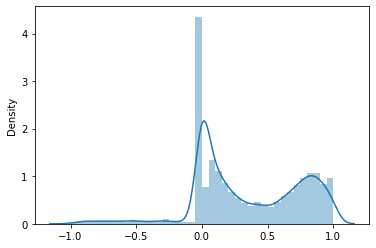

In [39]:
sns.distplot(data[['Positive', 'Negative', 'Neutral', 'Compound']])

C:\Users\mangl\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Positive'>

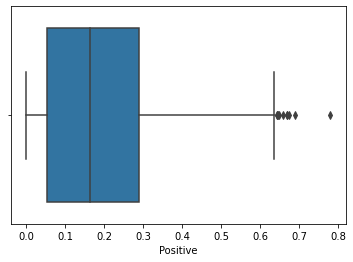

In [41]:
sns.boxplot(data.Positive)

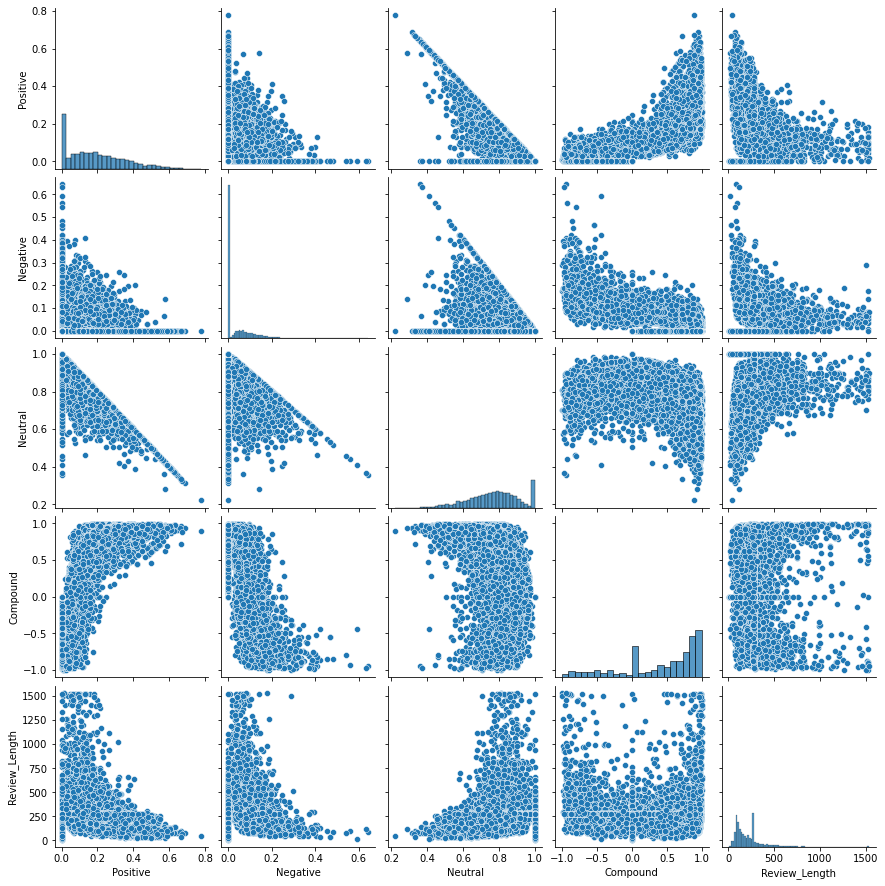

In [42]:
sns.pairplot(data)